# ¡Hola, Eduardo!  

Mi nombre es Francisco Benavides, soy code reviewer de Tripleten y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [58]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import HTML
#Funcion para calendarios
import calendar


## Cargar datos

In [59]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv("datasets/megaline_users.csv")
calls = pd.read_csv("datasets/megaline_calls.csv")
messages = pd.read_csv("datasets/megaline_messages.csv")
internet = pd.read_csv("datasets/megaline_internet.csv")
plans = pd.read_csv("datasets/megaline_plans.csv")

## Preparar los datos


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda eliminar los comentarios entre [] y añadir los propios
</div>

## Tarifas

In [60]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [61]:
# Imprime una muestra de los datos para las tarifas

display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Los datos mostrados en el dataframe se describen de manera similar a la descripcion, sin embargo existe la diferencia en la descripcion en cuantos a los Megabytes por mes incluido, ya que en la descripcion se expresa esta cifra en Gigabytes, convirtiendo los GB de la descripcion a MB entendemos que estamos hablando de la misma cantidad solamente expresada de otra manera.

Otro error notable en es que tenemos una columna llamada: "usd_monthly_pay" que almacena el pago mensual en dólares estadounidenses, mientras que en la descripcion del proyecto esta columna se llama  "usd_monthly_pay" por lo tanto para mantener similtud con los datos descritos es necesario cambiarle el nombre a esta columna.

En cuanto a tipo de datos en la tabla, para este caso no considero necesario hacer algun tipo de conversion. 


## Corregir datos

In [62]:
#Correcion de nombre de columna
plans = plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'})

print(plans.columns)

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_fee', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')


## Enriquecer los datos

Para este caso en especifico no se requiere agregar algun tipo de dato adicional para poder trabajar con el


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda añadir comentarios, aunque ya lo hayas hecho antes
</div>

## Usuarios/as

In [63]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [64]:
# Imprime una muestra de datos para usuarios

display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Este print no es necesario. Además en jupyter notebooks es aconsejable usar **display**
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
    
Es esta seccion se pedia mostrar una muestra del dataframe por eso utilice el print.
Teniendo en cuenta el comentario reemplace el print por "display"
</div>


Observamos que la salida de datos coincide con la informacion proporcionada, sin embargo tenemos la columna: "reg_date" y "churn_date"; Las columnas mencionadas son del tipo de dato object, se puede convertir este tipo de dato a datetime sin problema alguno.

Tenemos en cuenta tambien que los datos nulos o NaN en la columna churn_date representan que la tarifa se esta usando en el momento de la extraccion de la base de datos, este error se podria malinterpretar a que simplemente no existe informacion como tal, sin embargo podemos convertir estos nulos a otro valor mas representativo.

En la columna de la ciudad podemos observar que la cadena de caracteres que se usa se conforma del nombre de la ciudad, seguido por lo que parece ser una abreviatura de la ciudad o estado, se puede separar esta columna en 2 para poder utilizar esta informacion si nos interesaria hacer un estudio en un estado en lugar de una ciudad en concreto.


### Corregir los datos

In [65]:
# Convertir las columnas de fechas a tipo datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')  # Utiliza 'coerce' para manejar valores no válidos

# Verificar el cambio de tipo de datos
print(users.dtypes)
display(HTML('<hr>'))
display(users)


user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


### Enriquecer los datos

In [66]:
#para fines practicos se va a separar el nombre de la ciudad para poder manejarlo de mejor manera
# Supongamos que tu DataFrame se llama df
users[['City_Name', 'State_Abbreviation']] = users['city'].str.split(', ', expand=True)
#La columna city aun existe con esta informacion sin separar pero ahora es irrelevante, por ello decido descartarla
users = users.drop('city', axis=1)

# Muestra el DataFrame resultante
display(users)



,user_id,first_name,last_name,age,reg_date,plan,churn_date,City_Name,State_Abbreviation
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,Atlanta-Sandy Springs-Roswell,GA MSA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA MSA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,NaT,Las Vegas-Henderson-Paradise,NV MSA
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,NaT,Tulsa,OK MSA
4,1004,Leonila,Thompson,40,2018-05-23,surf,NaT,Seattle-Tacoma-Bellevue,WA MSA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,2018-09-04,surf,NaT,New York-Newark-Jersey City,NY-NJ-PA MSA
496,1496,Ariel,Shepherd,49,2018-02-20,surf,NaT,New Orleans-Metairie,LA MSA
497,1497,Donte,Barrera,49,2018-12-10,ultimate,NaT,Los Angeles-Long Beach-Anaheim,CA MSA
498,1498,Scot,Williamson,51,2018-02-04,surf,NaT,New York-Newark-Jersey City,NY-NJ-PA MSA



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con este dataframe!
</div>

## Llamadas

In [67]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [68]:
# Imprime una muestra de datos para las llamadas

display(calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


Podemos observar en la siguiente salida que los tipo de datos para este dataframe son adecuados excepto el de la columna: "Call_date" ya que estamos usando tipo de dato a object, un tipo de dato mas adecuado seria el Datetime.

Observamos Que los id del dataframe estan basados en el id de usuario, tambien notamos que la columna: "id" de la tabla calls no es lo suficientemente descriptiva, sabemos que representa los id de este dataframe, sin embargo si se llega a necesitar unir este dataframe con otro que tenga un dato similar, podria ser mas dificil de reconocer de que estamos hablando, por ello lo adecuado seria cambiar el nombre a uno mas descriptivo.

### Corregir los datos

In [69]:
#Cambiamos el tipo de dato de la columna "call_date" por uno mas adecuado
calls['call_date'] = pd.to_datetime(calls['call_date'])

#Renombramos la columna "id" por "call_id" para que sea mas descriptivo
calls = calls.rename(columns={'id': 'call_id'})

#redondear llamadas
calls['duration'] = np.ceil(calls['duration'])

display(calls)

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda redondear las llamadas, ya que esto se hace para cada una, no mensual
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se redondeaba mas adelante en el cuaderno, sin embargo se redondeaba de manera erronea, se corrigio con base a las observaciones dadas.
</div>

### Enriquecer los datos

Agregaremos una columna adicional llamada: "month". esta columna nos va a ayudar en que mes fue realizada una llamada para poder tener un mejor manejo de datos mas adelante.

In [70]:
# Agrega una nueva columna 'month' que contenga el mes de cada llamada
calls['month'] = calls['call_date'].dt.month

display(calls.head(20))

,call_id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12
5,1000_388,1000,2018-12-31,3.0,12
6,1000_510,1000,2018-12-27,6.0,12
7,1000_521,1000,2018-12-28,15.0,12
8,1000_530,1000,2018-12-28,6.0,12
9,1000_544,1000,2018-12-26,5.0,12



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el dataframe de llamadasm
</div>

## Mensajes

In [71]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [72]:
# Imprime una muestra de datos para los mensajes

display(messages)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


Igual que el dataframe anterior los datos de la columna que representan fechas estan en tipo object, se puede cambiar al tipo datetime para hacerlo mas adecuado.

Notamos que el patron de asignacion de id sigue el mismo comportamiento que otros dataframes, basandonse en el id del usuario, tambien notamos que el nombre de la columna id no describe sobre que dataframe estamos trabajando, es por ello que es necesario hacer una correccion para evitar confusiones. 

### Corregir los datos

In [73]:
#Cambiar el tipo de dato a datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

#renombrar columna id 
messages = messages.rename(columns={'id': 'message_id'})

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_id    76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

Se agregó una tabla adicional llamada: "month" para fines practicos.

In [74]:
# Agrega una nueva columna 'month' que contenga el mes de cada llamada
messages['month'] = messages['message_date'].dt.month

display(messages)

,message_id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el dataframe de mensajes!
</div>

## Internet

In [75]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [76]:
# Imprime una muestra de datos para el tráfico de internet
display(internet)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


Se puede cambiar el tipo de dato de la columna "session_date" por un datetime para que sea mas adecuado.

Al igual que el dataframe anterior la columna: "id" no es lo suficientemente descriptiva y si llegamos a unir este dataframe con otro se puede perder la nocion de que tabla proviene originalmente este id o que representa, es necesario cambiarlo; Como adicional podemos notar que la composicion del "id" es similar a la del dataframe anterior, es por ello que podria significar una confusion al intentar mezclar o combinar estos dataframes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [77]:
#Cambiar el tipo de dato a datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

#renombrar columna id 
internet = internet.rename(columns={'id': 'internet_id'})

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   internet_id   104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [78]:
# Agrega una nueva columna 'month' que contenga el mes de cada llamada
internet['month'] = internet['session_date'].dt.month

display(internet)

,internet_id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con el dataframe de internet!
</div>

## Estudiar las condiciones de las tarifas

In [79]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario


In [80]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month = calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')

# Muestra el resultado
display(calls_per_month)

,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [81]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
total_minutes_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')
# Resultado
display (total_minutes_per_month)

,user_id,month,total_minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
El redondeo debe ser por llamada, además debe usarse la función **np.ceil**, ya que se aproxima al entero superior. Salvo eso esta perfecto!
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Se corrigio el redondeo al principio en la seccion de cargar los datos de las llamadas con base a los comentarios.
</div>

In [82]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
total_messages_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name='message_count')

#resultado
display(total_messages_per_month)

,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [83]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

total_traffic_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name= 'internet_count')
#convertir a GB
total_traffic_per_month['internet_count'] = total_traffic_per_month['internet_count'] / 1024
#redondear 
total_traffic_per_month['internet_count'] = np.ceil(total_traffic_per_month['internet_count'])

#imprimir resultado
display(total_traffic_per_month)

total_traffic_per_month.info()

,user_id,month,internet_count
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2277 non-null   int64  
 1   month           2277 non-null   int32  
 2   internet_count  2277 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 44.6 KB



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
recuerda usar el método **np.ceil** para redondear los gigabytes
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Se aplico un redondeo usando el metodo np.ceil despues convertir los Megabytes a Gigabytes usando el metodo np.ceil    
    
</div>

In [84]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

merged_df = pd.merge(total_minutes_per_month, total_messages_per_month, how='outer', on=['user_id', 'month'])
merged_df = pd.merge(merged_df, total_traffic_per_month, how='outer', on=['user_id', 'month'])

#unir el dataframe con la tabla de usuarios para tener informacion completa
merged_df  = pd.merge(users, merged_df, how= 'left', on = 'user_id')

# Eliminar filas con valores no finitos en la columna 'month'
merged_df = merged_df.dropna(subset=['month'])

# Convertir la columna 'month' a enteros
merged_df['month'] = merged_df['month'].astype(int)

# Muestra el resultado
display(merged_df)



,user_id,first_name,last_name,age,reg_date,plan,churn_date,City_Name,State_Abbreviation,month,total_minutes,message_count,internet_count
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,Atlanta-Sandy Springs-Roswell,GA MSA,12,124.0,11.0,2.0
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA MSA,8,182.0,30.0,7.0
2,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA MSA,9,315.0,44.0,14.0
3,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA MSA,10,393.0,53.0,22.0
4,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA MSA,11,426.0,36.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,2018-02-04,surf,NaT,New York-Newark-Jersey City,NY-NJ-PA MSA,12,339.0,NaN,23.0
2299,1499,Shena,Dickson,37,2018-05-06,surf,NaT,Orlando-Kissimmee-Sanford,FL MSA,9,346.0,NaN,13.0
2300,1499,Shena,Dickson,37,2018-05-06,surf,NaT,Orlando-Kissimmee-Sanford,FL MSA,10,385.0,NaN,20.0
2301,1499,Shena,Dickson,37,2018-05-06,surf,NaT,Orlando-Kissimmee-Sanford,FL MSA,11,308.0,NaN,17.0


In [85]:
# Añade la información de la tarifa
# Unir el DataFrame resultante con el DataFrame de planes
final_df = pd.merge(merged_df, plans, how='left', left_on='plan', right_on='plan_name')

# Muestra el resultado
display(final_df) 

,user_id,first_name,last_name,age,reg_date,plan,churn_date,City_Name,State_Abbreviation,month,...,message_count,internet_count,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,Atlanta-Sandy Springs-Roswell,GA MSA,12,...,11.0,2.0,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA MSA,8,...,30.0,7.0,50,15360,500,20,10,0.03,0.03,surf
2,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA MSA,9,...,44.0,14.0,50,15360,500,20,10,0.03,0.03,surf
3,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA MSA,10,...,53.0,22.0,50,15360,500,20,10,0.03,0.03,surf
4,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA MSA,11,...,36.0,19.0,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,Scot,Williamson,51,2018-02-04,surf,NaT,New York-Newark-Jersey City,NY-NJ-PA MSA,12,...,NaN,23.0,50,15360,500,20,10,0.03,0.03,surf
2289,1499,Shena,Dickson,37,2018-05-06,surf,NaT,Orlando-Kissimmee-Sanford,FL MSA,9,...,NaN,13.0,50,15360,500,20,10,0.03,0.03,surf
2290,1499,Shena,Dickson,37,2018-05-06,surf,NaT,Orlando-Kissimmee-Sanford,FL MSA,10,...,NaN,20.0,50,15360,500,20,10,0.03,0.03,surf
2291,1499,Shena,Dickson,37,2018-05-06,surf,NaT,Orlando-Kissimmee-Sanford,FL MSA,11,...,NaN,17.0,50,15360,500,20,10,0.03,0.03,surf



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo juntando todos los dataframes!
</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [86]:
# Calcula el ingreso mensual para cada usuario
# Calcular ingresos por llamadas
final_df['call_revenue'] = (final_df['total_minutes'] - final_df['minutes_included']) * final_df['usd_per_minute']
final_df['call_revenue'] = final_df['call_revenue'].apply(lambda x: 0 if x < 0 else x)

# Calcular ingresos por mensajes
final_df['message_revenue'] = (final_df['message_count'] - final_df['messages_included']) * final_df['usd_per_message']
final_df['message_revenue'] = final_df['message_revenue'].apply(lambda x: 0 if x < 0 else x)

# Calcular ingresos por datos
final_df['data_revenue'] = ((final_df['internet_count'] - final_df['mb_per_month_included']) / 1024) * final_df['usd_per_gb']
final_df['data_revenue'] = final_df['data_revenue'].apply(lambda x: 0 if x < 0 else x)

# Calcular el total de ingresos mensuales por usuario
final_df['total_revenue'] = final_df['call_revenue'] + final_df['message_revenue'] + final_df['data_revenue'] + final_df['usd_monthly_fee']

# Muestra el resultado
display (final_df[['user_id', 'month', 'total_revenue']])


,user_id,month,total_revenue
0,1000,12,70.00
1,1001,8,20.00
2,1001,9,20.00
3,1001,10,20.09
4,1001,11,20.00
...,...,...,...
2288,1498,12,NaN
2289,1499,9,NaN
2290,1499,10,NaN
2291,1499,11,NaN



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien calculado el gasto total!
</div>

## Estudia el comportamiento de usuario

### Llamadas

plan,surf,ultimate
month,,
Jan,203.000000,193.500000
Feb,297.000000,470.333333
Mar,330.000000,304.250000
Apr,351.540000,336.857143
May,410.240000,406.241379
Jun,435.791667,387.444444
Jul,453.733333,427.067797
Aug,417.849057,421.436620
Sep,420.732984,437.511628


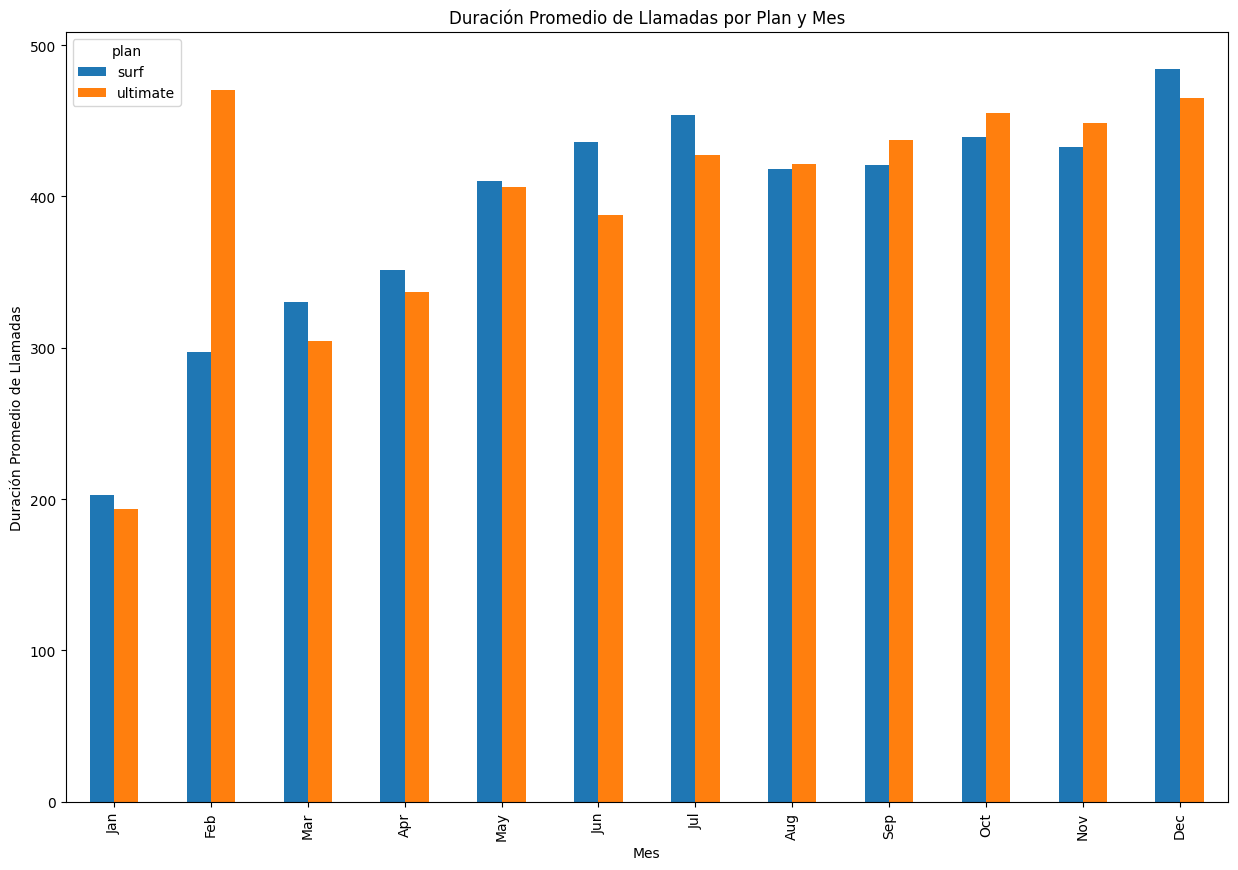

In [87]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Calcular el promedio 
average_duration_per_plan_month = final_df.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# print(average_duration_per_plan_month)

pivot_table = average_duration_per_plan_month.pivot(index='month', columns='plan', values='total_minutes')

pivot_table.index = pivot_table.index.map(lambda x: calendar.month_abbr[x])

pivot_table.plot(kind='bar', xlabel='Mes', ylabel= 'Duración Promedio de Llamadas', title='Duración Promedio de Llamadas por Plan y Mes', figsize= [15,10])
display(pivot_table)

Conclusion Grafico de barras 

En este grafico comprendemos el comportamiendo de los usuarios de ambos planes (surf y ultimate) podemos observar que en general conforme pasan los meses la duracion promedio de las llamadas aumenta con respecto al mes anterior para ambos planes; Sin embargo en febrero podemos analizar un crecimiento demasiado alto en el plan ultimate comparado con el plan surf (173 minutos de diferencia), siendo que el mes pasado (enero) el plan surf habia superado por poco al plan ultimate.

De enero a julio (sin contar febrero) observamos que el plan surf registra un promedio mas alto en llamadas en comparacion al ultimate, despues en agosto el plan ultimate toma la ventaja ahora con una minima diferencia al menos hasta noviembre, ya que en diciembre el plan surf vuelve a tener la ventaja sobre este.

La fluctuación en la duración promedio de las llamadas entre los dos planes indica que este comportamiento puede deberse ya sea por la adicion de nuevos usuarios para ambas tarifas ya que estos buscan la mas conveniente segun sus preferencias y tambien a que un usuario decida cambiarse de una tarifa a otra segun sus necesidades se adapten, tampoco hay que descartas la idea de que cierta publicidad haya tenido mas efecto sobre una tarifa.

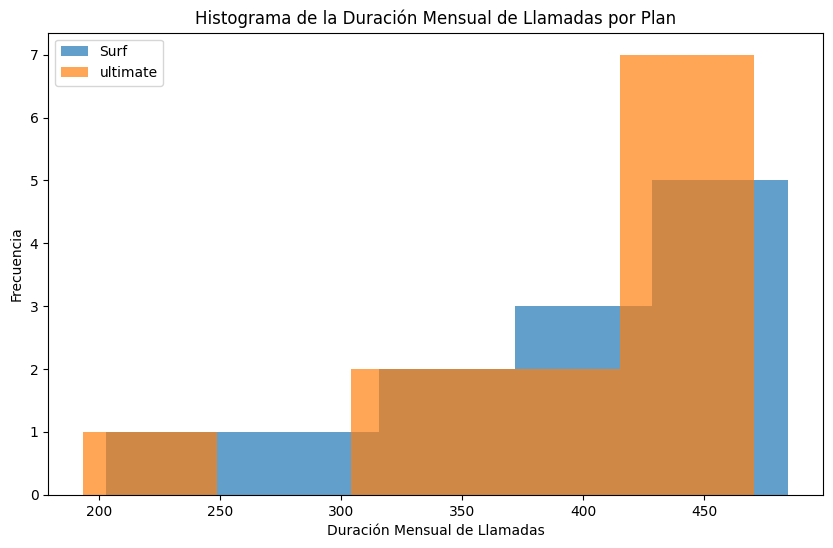

In [88]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Datos de duración mensual de llamadas por plan
data_surf = average_duration_per_plan_month[average_duration_per_plan_month['plan'] == 'surf']['total_minutes']
data_ultimate = average_duration_per_plan_month[average_duration_per_plan_month['plan'] == 'ultimate']['total_minutes']

# Graficar histograma
plt.figure(figsize=(10, 6))
plt.hist(data_surf, bins=5, alpha=0.7, label=['Surf', 'Ultimate'])
plt.hist(data_ultimate, bins=5, alpha=0.7, label=['Surf', 'Ultimate'])

plt.xlabel('Duración Mensual de Llamadas')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Duración Mensual de Llamadas por Plan')
plt.legend(['Surf','ultimate'])
plt.show()

Conclusion histograma

Este histograma esta sesgado a la izquierda, esto los indica que hay mas valores por encima de la media, la frecuencia de las llamadas que mas duracion tienen es mas alta que las de menor duracion, para ambos casos.

A pesar de tener una tendencia similar notamos que la ambas tarifas no se se parecen mas alla de eso, pues notamos que el aumento de frecuencia es mas porporcionado en el plan surf que en el ultimate, ya que este sube abruptamente cuando mas alto es su valor sobre el la duracion mensual de las llamadas (eje x) 

Con esto podemos entender que si bien hay usuarios en el plan ultimate que hay frecuencia en valores bajos en el plan ultimate este tiende a tener los valores mas altos cuando la duracion es mayor; Mientras tanto, la tarifa surf tiene un aumento de frecuencia mas gradual pero no termina de alcanzar el mismo nivel de frecuencia que la tarifa surf, aunque abarca rangos mas altos que este.


In [89]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_duration = average_duration_per_plan_month['total_minutes'].mean()
variance_duration = average_duration_per_plan_month['total_minutes'].var()

print(f"Media de la duración mensual de llamadas: {mean_duration:.2f} minutos")
print(f"Varianza de la duración mensual de llamadas: {variance_duration:.2f} minutos^2")


Media de la duración mensual de llamadas: 392.90 minutos
Varianza de la duración mensual de llamadas: 6234.60 minutos^2


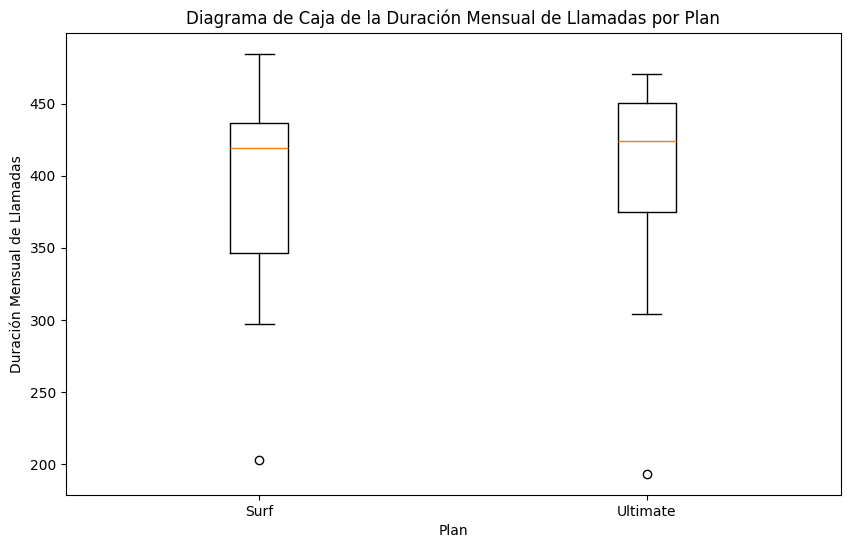

419.29102044848366
424.2522081642397


In [90]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Graficar el diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot([average_duration_per_plan_month[average_duration_per_plan_month['plan'] == 'surf']['total_minutes'],
             average_duration_per_plan_month[average_duration_per_plan_month['plan'] == 'ultimate']['total_minutes']],
            labels=['Surf', 'Ultimate'])

plt.xlabel('Plan')
plt.ylabel('Duración Mensual de Llamadas')
plt.title('Diagrama de Caja de la Duración Mensual de Llamadas por Plan')
plt.show()

print(average_duration_per_plan_month[average_duration_per_plan_month['plan'] == 'surf']['total_minutes'].median())
print(average_duration_per_plan_month[average_duration_per_plan_month['plan'] == 'ultimate']['total_minutes'].median())

En el diagrama de caja, se identifican diferencias significativas entre las tarifas Surf y Ultimate. Ambas presentan valores atípicos bajos, pero la caja de Surf es más amplia, indicando mayor variabilidad en la duración de llamadas. Aunque las medianas son cercanas, Ultimate tiene una mediana ligeramente más alta. 

Los bigotes de Surf muestran una extensión similar tanto hacia valores altos como bajos, acercándose mas a valores bajos, mientras que los de Ultimate tiene un bigote mas amplio hacia valores más bajos y limitando la dispersión hacia valores altos.

En resumen, Surf tiene mayor variabilidad, mientras que Ultimate concentra valores más altos con menos variabilidad.








<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Hay gráficos sin conclusiones/analisis
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Se elaboro un analisis y conclusion especifico para cada diagrama   
    
</div>

### Mensajes

<Axes: title={'center': 'Promedio de mensajes enviados por Plan y Mes'}, xlabel='Mes', ylabel='Promedio de mensajes enviados'>

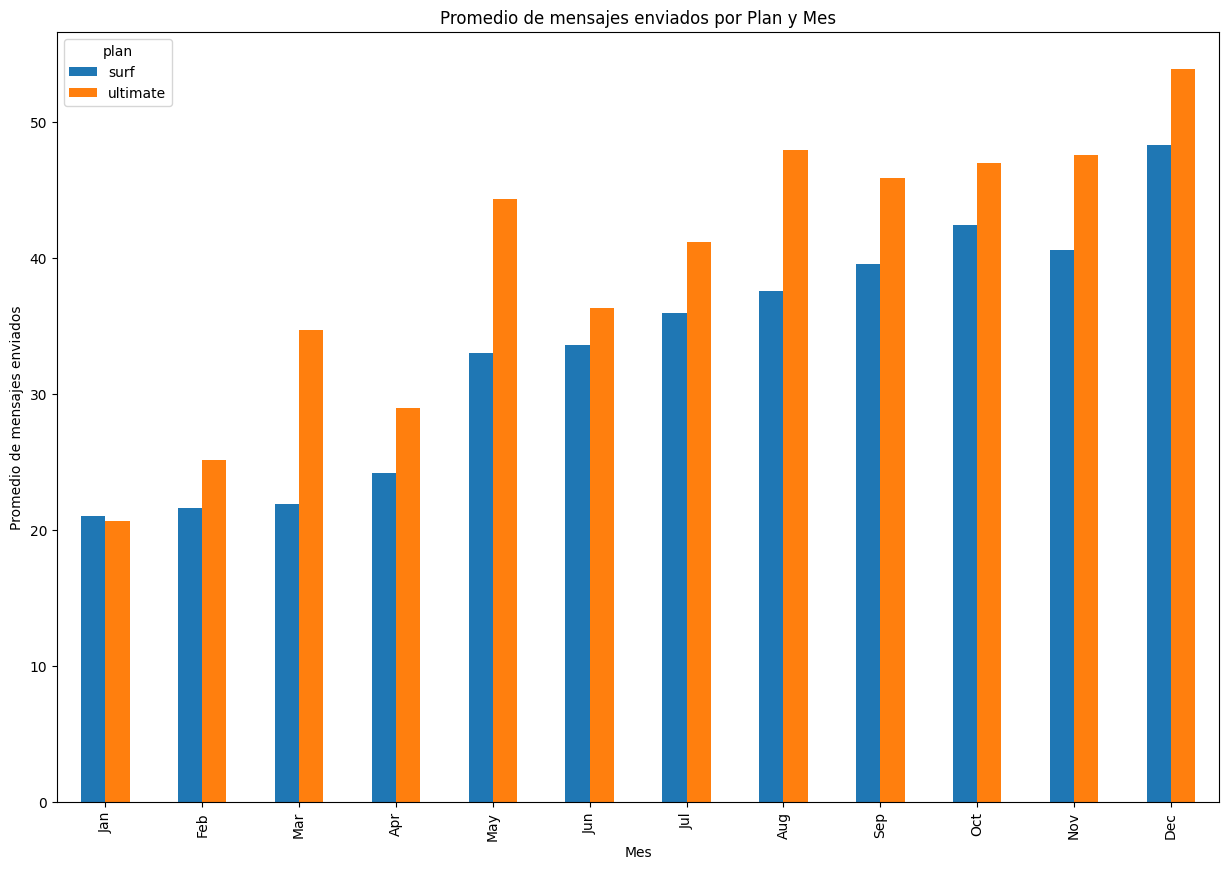

In [91]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Calcular el promedio 
average_messages_per_plan_month = final_df.groupby(['plan', 'month'])['message_count'].mean().reset_index()
# print(average_duration_per_plan_month)

pivot_table = average_messages_per_plan_month.pivot(index='month', columns='plan', values='message_count')

pivot_table.index = pivot_table.index.map(lambda x: calendar.month_abbr[x])

pivot_table.plot(kind='bar', xlabel='Mes', ylabel= 'Promedio de mensajes enviados', title='Promedio de mensajes enviados por Plan y Mes', figsize= [15,10])

Conclusion grafico de barras

En este grafico observamos un crecimiento gradual conforme pasan los meses para ambos planes, ninguno baja con respecto al mes anterior, esto de inicio nos indica que conforme pasa el tiempo la gente envia mas mensajes o que mas gente contrata alguna de las 2 tarifas.

Ahora bien si analizamos el mes de Enero observamos que el promedio de mensajes para el plan surf supero por poco al plan ultimate, una diferencia minima, pero despues de ello observamos los siguientes meses como es el plan ultimate el que toma la delantera ya que esta situacion no se vuelve a presentar; inclusi si analizamos bien los meses marzo, mayo, agosto son los meses en los que el plan ultimate sobresalio.

En general la tendencia para el plan ultimate es la de mandar muchos mensajes, sin embargo no sigue un crecimiento tan gradual ya que hay meses en los que este promedio baja, por ejemplo hay una gran diferencia entre el mes de marzo y abril, mayo y junio, y una diferencia mas ligera entre agosto y septiembre; por otro lado vemos que la tendencia del plan surf va subiendo gradualmente hasta abril donde sube un poco mas de lo habitual y se mantiene hasta octubre subiendo de poco en poco, ya en noviembre vemos que baja un poco para recuperarse en diciembre.

En conclusion, ambos planes presentan aumentos a lo largo del año, los usuarios del plan ultimate tienden a mandar mas mensajes que los de surf, en ciertos meses se dispara la cantidad de mensajes enviados este es mas notable en la tarifa ultimate; El aumento de este promedio de mensaje enviados puede estar influenciado por factores como el cambio de usuario de una tarifa a otra dependiendo sus necesidades o tambien que se lleve a cabo alguna promocion o evento donde cierto plan se beneficie.

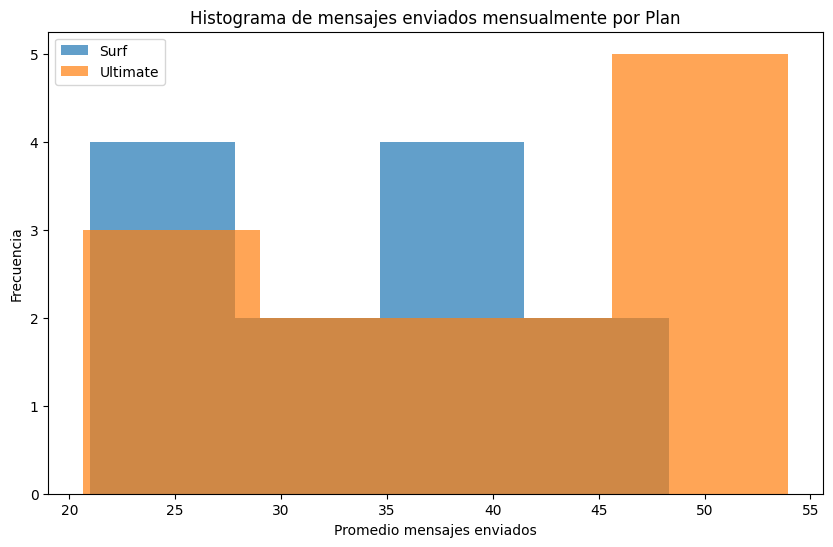

In [92]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Datos de mensajes enviados por plan
data_surf = average_messages_per_plan_month[average_messages_per_plan_month['plan'] == 'surf']['message_count']
data_ultimate = average_messages_per_plan_month[average_messages_per_plan_month['plan'] == 'ultimate']['message_count']

# Graficar histograma
plt.figure(figsize=(10, 6))
plt.hist(data_surf, bins=4, alpha=0.7, label=['Surf', 'Ultimate'])
plt.hist(data_ultimate, bins=4, alpha=0.7, label=['Surf', 'Ultimate'])

plt.xlabel('Promedio mensajes enviados')
plt.ylabel('Frecuencia')
plt.title('Histograma de mensajes enviados mensualmente por Plan')
plt.legend(['Surf','Ultimate'])
plt.show()


Conclusion histograma

En ambos planes (Surf y Ultimate ), los histogramas revelan dos picos de frecuencia que indican tendencias distintas entre los usuarios; Aunque el el primer pico de surf es mas estrecho pero mas frecuente, el plan Ultimate muestra una frecuencia constante despues de su primer pico y se mantiene hasta despues de presentarse el segundo pico del plan surf, sin embargo el ultimo pico del plan ultimate lo supera.

Estas observaciones sugieren comportamientos diferenciados en la duración de llamadas, pero se necesita un análisis más profundo para comprender completamente estas tendencias y subgrupos dentro de los usuarios.

In [93]:
# Calcular la media y la varianza de los mensajes enviados
mean_messages = average_messages_per_plan_month['message_count'].mean()
variance_messages = average_messages_per_plan_month['message_count'].var()

print(f"Media de los mensajes enviados: {mean_messages:.2f} mensajes")
print(f"Varianza de los mensajes enviados: {variance_messages:.2f} mensajes^2")

Media de los mensajes enviados: 36.39 mensajes
Varianza de los mensajes enviados: 101.22 mensajes^2


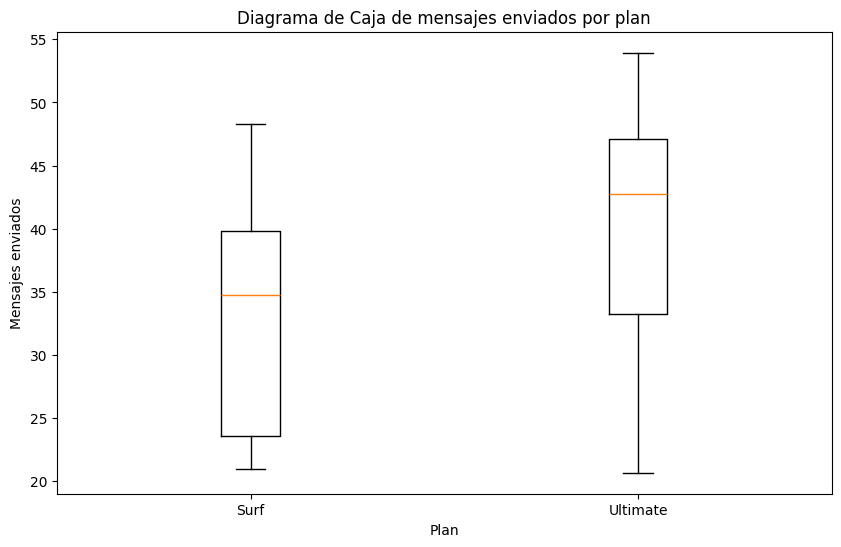

34.78074665060966
42.773049645390074


In [94]:
# Traza un diagrama de caja para visualizar la distribución de mensajes enviados mensualmente
# Graficar el diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot([average_messages_per_plan_month[average_messages_per_plan_month['plan'] == 'surf']['message_count'],
             average_messages_per_plan_month[average_messages_per_plan_month['plan'] == 'ultimate']['message_count']],
            labels=['Surf', 'Ultimate'])

plt.xlabel('Plan')
plt.ylabel('Mensajes enviados')
plt.title('Diagrama de Caja de mensajes enviados por plan')
plt.show()

print(average_messages_per_plan_month[average_messages_per_plan_month['plan'] == 'surf']['message_count'].median())
print(average_messages_per_plan_month[average_messages_per_plan_month['plan'] == 'ultimate']['message_count'].median())

Conclusion diagrama de caja

En el análisis del diagrama de caja para ambas tarifas (Surf y Ultimate), se destacan las siguientes observaciones:

La mediana de Surf es menor que la mediana de Ultimate, indicando una tendencia central más baja en la duración de llamadas para el plan Surf.

Ambos diagramas no presentan valores atípicos, pero muestran un rango amplio de variabilidad en la duración de las llamadas.

El bigote inferior en el plan Surf es más corto que el superior, mientras que en el plan Ultimate es lo contrario, sugiriendo una distribución más concentrada en valores bajos para Surf y en valores altos para Ultimate.

Ultimate abarca un rango mucho más amplio de variabilidad y tiende a concentrarse en valores más altos, indicando que los usuarios de Ultimate tienen una mayor dispersión en la duración de sus llamadas y tienden a realizar llamadas más largas en comparación con Surf.

En resumen, el diagrama de caja evidencia diferencias claras entre las dos tarifas en cuanto los mensajes enviados, proporcionando una visión visual de la variabilidad y tendencias centrales en cada plan.

### Internet

<Axes: title={'center': 'Promedio de consumo de internet por mes segun la tarifa'}, xlabel='Mes', ylabel='Promedio de internet consumido (GB)'>

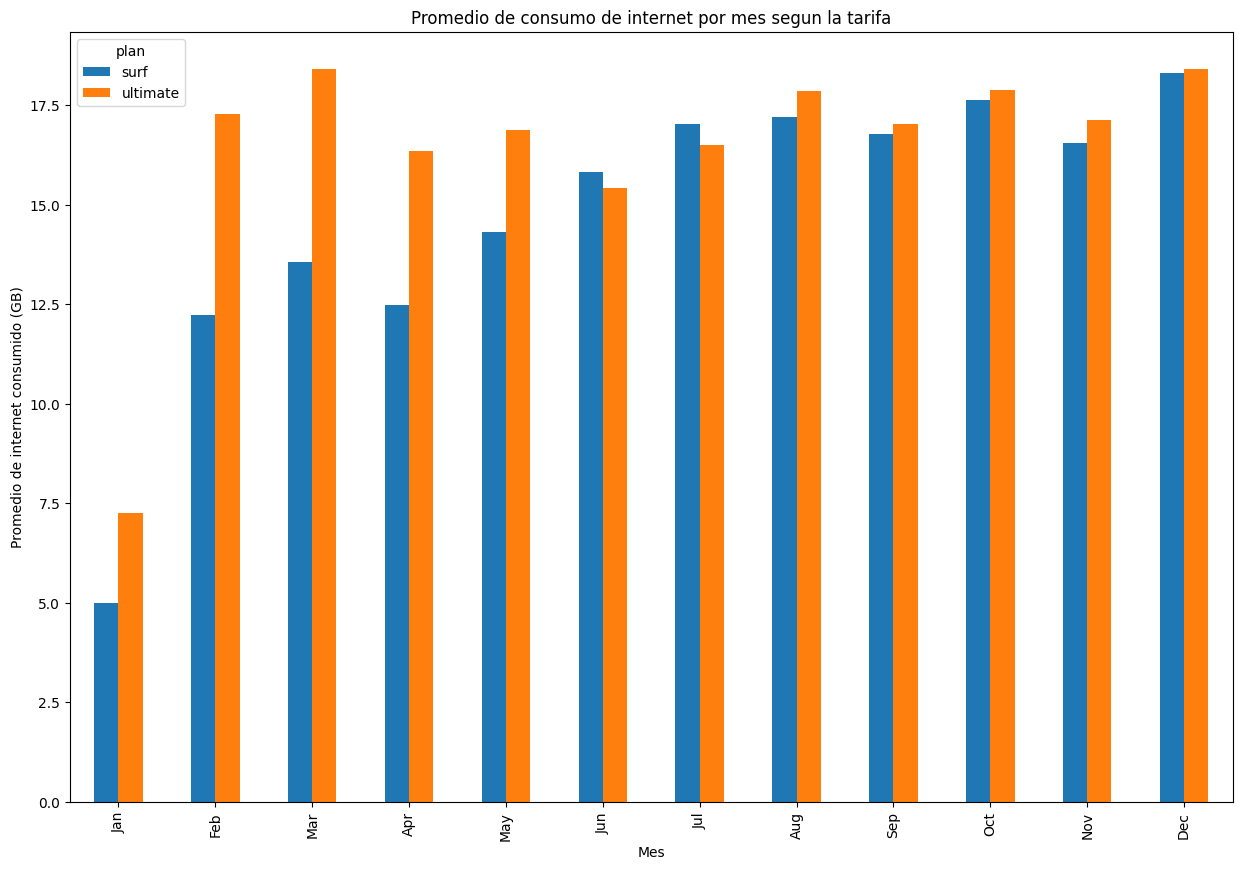

In [95]:
# Comprara el consume de internet cada mes para los usuarios de cada plan
# Calcular el promedio 
average_internet_per_plan_month = final_df.groupby(['plan', 'month'])['internet_count'].mean().reset_index()

# print(average_internet_per_plan_month)

pivot_table = average_internet_per_plan_month.pivot(index='month', columns='plan', values='internet_count')

pivot_table.index = pivot_table.index.map(lambda x: calendar.month_abbr[x])

pivot_table.plot(kind='bar', xlabel='Mes', ylabel= 'Promedio de internet consumido (GB)', title='Promedio de consumo de internet por mes segun la tarifa', figsize= [15,10])

Conclucion grafico de barras.

En este grafico empezando por el plan ultimate notamos que tiene un gran crecimiento los primeros 2 meses y el tercero tiene otra aumento no tan drastico, vemos como baja y vuevlve a subir a lo largo de los meses pero no alcanza de nuevo su punto maximo que fue en marzo, tambien notamos que en el mes de junio este bajo tanto que logro que el plan surf sobresaliera en este mes, si notamos con atencion vemos que esta es la unica exepcion pues en los demas meses el plan ultimate siempre sobresalia por encima del plan surf

Ahora si observamos el plan surf, notamos que un crecimiento notable entre enero y febrero, pero siguio con una tendencia similar que el plan ultimate de subir algunos meses y despues bajar, sin embargo como ya mencionamos en junio este plan sobresalio por encima del plan ultimate, pero no con tanta diferencia, a partir de ahi notamos que el consumo de internet se mantiene casi a la par que el plan ultimate sin llegar a igualarlo o sobrepasarlo de nuevo.

En conclusion podemos decir que el plan ultimate es la tarifa que tiene mas consumo de internet a lo largo del año, sin embargo esto no quiere decir que en todos los meses se descate por encima del plan surf podemos decir que este; Tambien observamos que la tarifa surf presenta una variabilidad mas baja, ya que los valores de este plan si bien bajan no caen abruptamente como lo hacen los del plan ultimate.

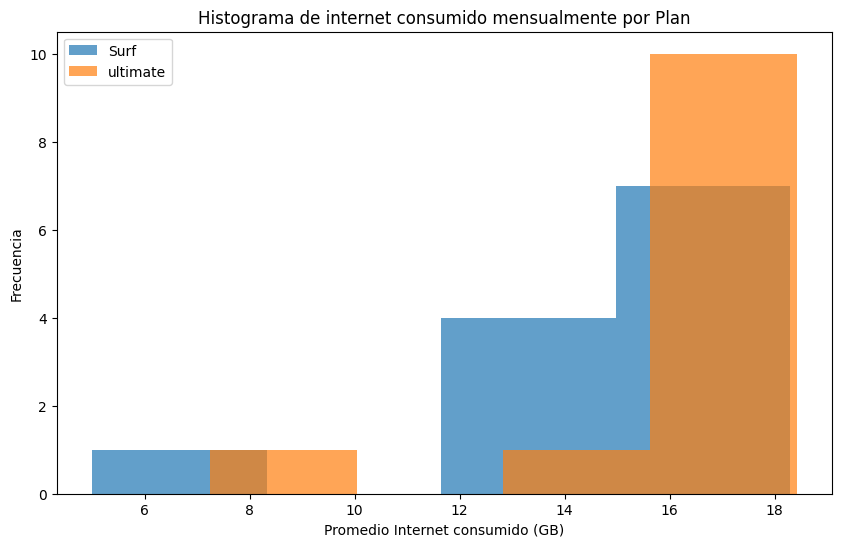

In [96]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Datos de duración mensual de llamadas por plan
data_surf = average_internet_per_plan_month[average_internet_per_plan_month['plan'] == 'surf']['internet_count']
data_ultimate = average_internet_per_plan_month[average_internet_per_plan_month['plan'] == 'ultimate']['internet_count']

# Graficar histograma
plt.figure(figsize=(10, 6))
plt.hist(data_surf, bins=4, alpha=0.7, label=['Surf', 'Ultimate'])
plt.hist(data_ultimate, bins=4, alpha=0.7, label=['Surf', 'Ultimate'])

plt.xlabel('Promedio Internet consumido (GB)')
plt.ylabel('Frecuencia')
plt.title('Histograma de internet consumido mensualmente por Plan')
plt.legend(['Surf','ultimate'])
plt.show()

Conclusion histograma

Ambos histogramas muestran un sesgo a la izquierda y una baja frecuencia al inicio, indicando que la mayoría de los usuarios tiende a tener un consumo de internet más bajo. El histograma del plan Surf abarca un rango más amplio de consumo de internet, sugiriendo una mayor variabilidad, mientras que el plan Ultimate presenta un rango más estrecho pero con mayor frecuencia, indicando que la mayoría de los usuarios de este plan tiende a consumir más datos.

In [97]:
# Calcular la media y la varianza de los mensajes enviados
mean_messages = average_internet_per_plan_month['internet_count'].mean()
variance_messages = average_internet_per_plan_month['internet_count'].var()

print(f"Media de internet consumido: {mean_messages:.2f} GB")
print(f"Varianza de internet consumido: {variance_messages:.2f} GB^2")

Media de internet consumido: 15.55 GB
Varianza de internet consumido: 11.46 GB^2


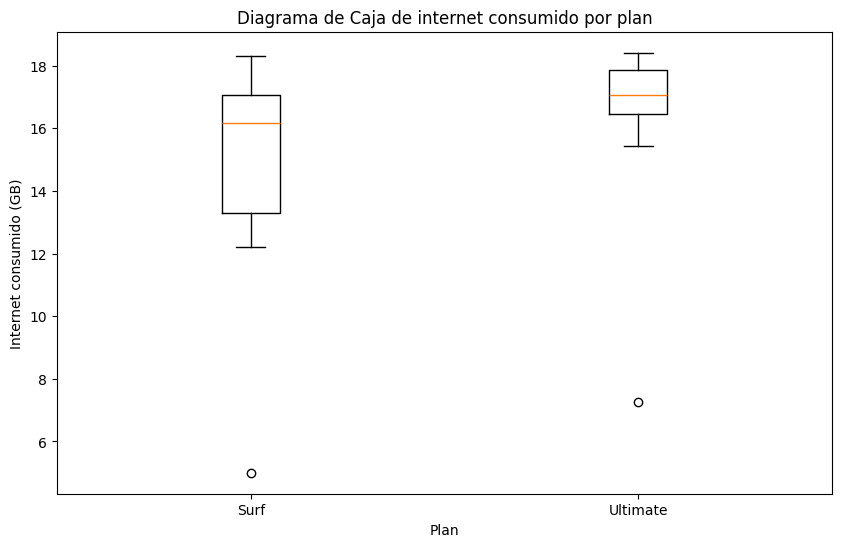

In [98]:
# Traza un diagrama de caja para visualizar la distribución del internet consumido mensualmente
# Graficar el diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot([average_internet_per_plan_month[average_internet_per_plan_month['plan'] == 'surf']['internet_count'],
             average_internet_per_plan_month[average_internet_per_plan_month['plan'] == 'ultimate']['internet_count']],
            labels=['Surf', 'Ultimate'])

plt.xlabel('Plan')
plt.ylabel('Internet consumido (GB)')
plt.title('Diagrama de Caja de internet consumido por plan')
plt.show()


Conclusion diagrama de caja 

Ambos planes (Surf y Ultimate) muestran valores atípicos, siendo Surf el que tiene el valor atípico más bajo. El rango de consumo de datos es más amplio en Surf, mientras que Ultimate tiene un rango más corto pero se concentra en valores altos. 

En general, ambos planes se centran en valores altos, siendo Ultimate el que presenta la mayor concentración en esta categoría en comparación con Surf.

## Ingreso

<Axes: title={'center': 'Ganancias por mes segun la tarifa'}, xlabel='Mes', ylabel='Ganancias'>

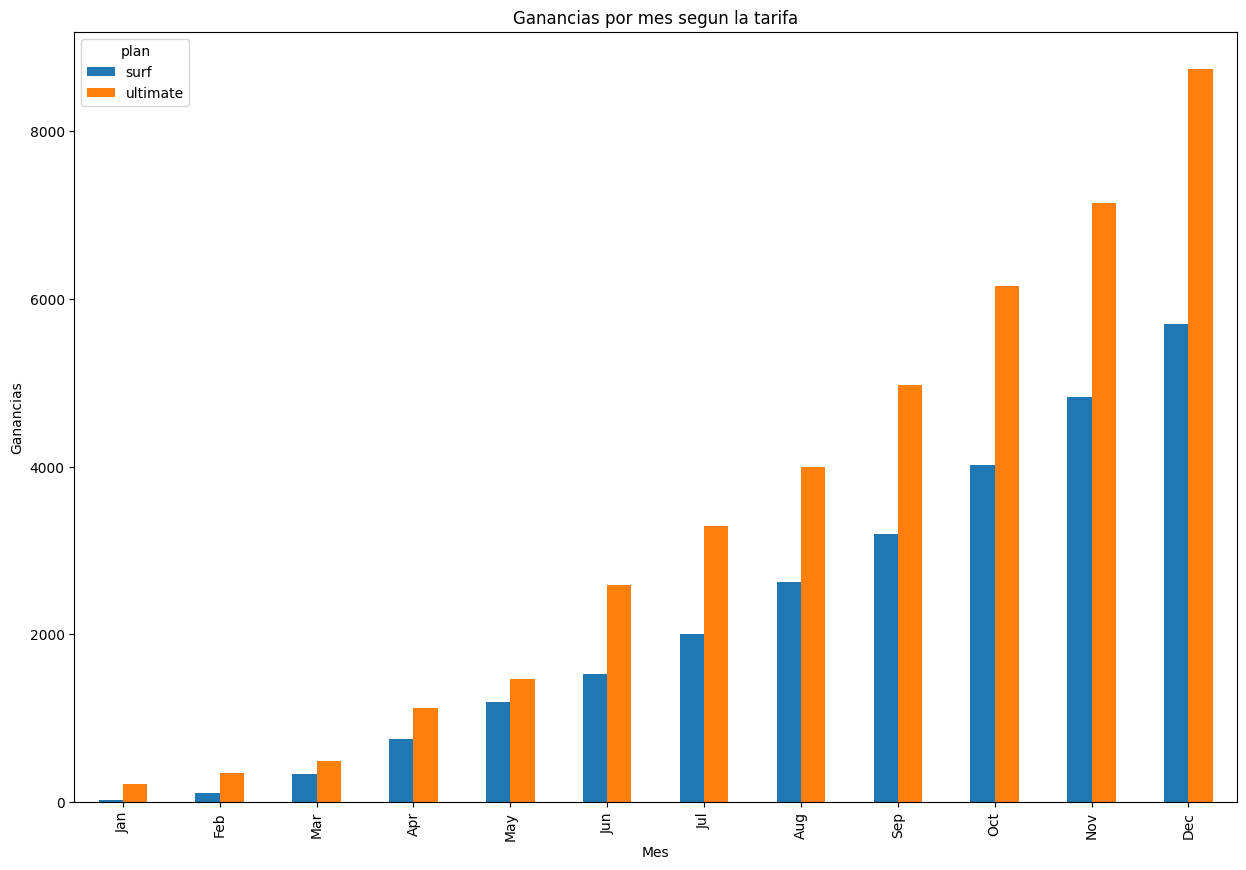

In [99]:
#calcular total de ingresos por plan
total_revenue_per_plan_month = final_df.groupby(['plan', 'month'])['total_revenue'].sum().reset_index()
average_revenue_per_plan_month = final_df.groupby(['plan', 'month'])['total_revenue'].mean().reset_index()
#comparar en un grafico de barras

pivot_table = total_revenue_per_plan_month.pivot(index='month', columns='plan', values='total_revenue')
pivot_table.index = pivot_table.index.map(lambda x: calendar.month_abbr[x])

pivot_table.plot(kind='bar', xlabel='Mes', ylabel= 'Ganancias', title='Ganancias por mes segun la tarifa', figsize= [15,10])
#print(total_revenue_per_plan_month)

Conclusion diagrama de barras 

Podemos observar como en esta grafica hay un aumento gradual para ambos planes y se sigue esa tendencia a lo largo del año, esto es debido a que conforme pasa el año mas usuarios se suman a uno de estos dos planes es simplemente un crecimiento gradual que nos indica que la compañia va en aumento y esto se transforma en ingreso.

Ahora podemos notar que se genera mas ingreso en el plan ultimate que en el plan surf, esto se debe principalmente a que el precio del plan ultimate es mas elevado, la unica forma de que este crecimiento se viera superado por el plan surf es que el plan ultimate tuviera una cantidad muy baja de usuarios, sin embargo no es el caso.

En conclusion, el plan ultimate genera mucho mas ingresos que el plan surf a pesar pues vemos que los usuarios tampoco tienden a sobrepasarse tanto de las caracteristicas que ofrecen sus planes.

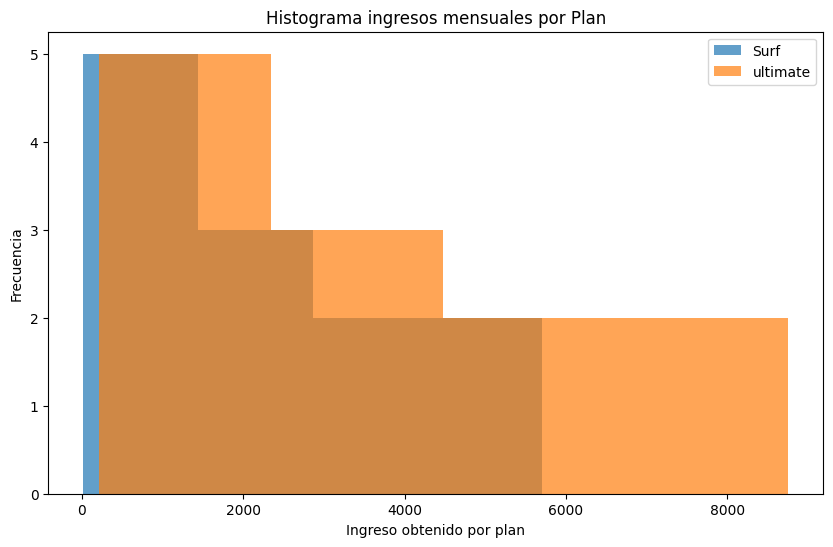

In [100]:
# comparacion de ingreso mensual por plan

# Datos de ingreso mensual por plan
data_surf = total_revenue_per_plan_month[total_revenue_per_plan_month['plan'] == 'surf']['total_revenue']
data_ultimate = total_revenue_per_plan_month[total_revenue_per_plan_month['plan'] == 'ultimate']['total_revenue']

# Graficar histograma
plt.figure(figsize=(10, 6))
plt.hist(data_surf, bins=4, alpha=0.7, label=['Surf', 'Ultimate'])
plt.hist(data_ultimate, bins=4, alpha=0.7, label=['Surf', 'Ultimate'])

plt.xlabel('Ingreso obtenido por plan')
plt.ylabel('Frecuencia')
plt.title('Histograma ingresos mensuales por Plan')
plt.legend(['Surf','ultimate'])
plt.show()


Conclusion histograma

El análisis del histograma revela un sesgo a la derecha para ambos planes (Surf y Ultimate), indicando que los valores más altos de ingresos ocurren con baja frecuencia. Aunque ambos planes muestran esta tendencia, se destaca que el plan Ultimate tiene un rango más amplio de ingresos en comparación con Surf. 

En resumen, mientras que los valores más altos son menos frecuentes en ambos planes, Ultimate exhibe una mayor variabilidad en los ingresos.


In [101]:
# Calcular la media y la varianza de los ingresos 
mean_messages = total_revenue_per_plan_month['total_revenue'].mean()
variance_messages = total_revenue_per_plan_month['total_revenue'].var()

print(f"Media de ingresos: {mean_messages:.2f} $")
print(f"Varianza de ingresos: {variance_messages:.2f} $^2")

Media de ingresos: 2784.61 $
Varianza de ingresos: 6038627.47 $^2


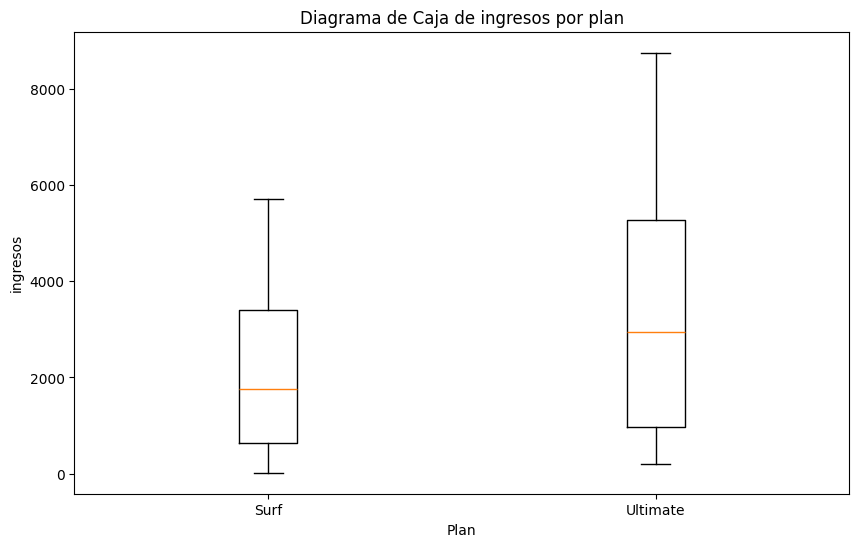

In [102]:
# Traza un diagrama de caja para visualizar la distribución del internet consumido mensualmente
# Graficar el diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot([total_revenue_per_plan_month[total_revenue_per_plan_month['plan'] == 'surf']['total_revenue'],
             total_revenue_per_plan_month[total_revenue_per_plan_month['plan'] == 'ultimate']['total_revenue']],
            labels=['Surf', 'Ultimate'])

plt.xlabel('Plan')
plt.ylabel('ingresos')
plt.title('Diagrama de Caja de ingresos por plan')
plt.show()

conclusion diagrama de caja

Podemos observar en este diagrama que la caja que representa al plan surf es mucho mas pequeña que la del plan ultimate y abarca valores mas bajos que la del plan ultimate, mientras que la de el plan ultimate tiene una mediana mas elevada que el plan surf y abarca un rango mas amplio de ingresos.

Es mas que evidente las diferencias de ingresos entre ambos planes. 


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
En general faltan analisis sobre los gráficos
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
    
Se elaboro una conclusion por diagrama graficado.
</div>


## Prueba las hipótesis estadísticas

Hipotesis nula = Los ingresos promedio de los usuarios de los planes Surf y Ultimate son iguales.
Hipotesis alternativa = los ingresos promedio de los usuarios son diferentes
valor alpha = 0.05


In [103]:
# Prueba las hipótesis
alpha = 0.05

#print(data_surf)
#print(data_ultimate)

results = st.ttest_ind(data_surf, data_ultimate, equal_var = False)

print('valor p:', results.pvalue)  

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.247548910302334
No podemos rechazar la hipótesis nula


Hipotesis nula = El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

Hipotesis alternativa = El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Alpha = 0.05

In [104]:
# Prueba las hipótesis
ny_nj_data = final_df[final_df['State_Abbreviation'] == 'NY-NJ-PA MSA']['total_revenue']
ny_nj_data = ny_nj_data.dropna()
other_region_data = final_df[final_df['State_Abbreviation'] != 'NY-NJ-PA MSA']['total_revenue']
other_region_data = other_region_data.dropna()

results = st.ttest_ind(ny_nj_data, other_region_data, equal_var = False)

print('valor p:', results.pvalue)  

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


#print(ny_nj_data)

valor p: 1.8982498671682443e-06
Rechazamos la hipótesis nula



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente aplicación de los test
</div>

## Conclusión general

1. Procesamientos de datos
Al cargar los datos se observo que tenian pequeñas diferencias con la descripcion proporcionada, pero no era nada que interfiriera mucho con el entendimiento del proyecto, sin embargo se cambiaron ciertos tipos de datos para poder realizar un analisis mejor y tambien se enriquecieron algunas tablas con informacion que ayudo para el analisis.

2. Tarifas
Entemos que el plan ultimate es el plan con el costo mas elevado comparado con el surf, pero tambien este plan ofrece un limite mayor de llamadas, mensaje e internet que su competencia ademas de que el cobro por excedente en este plan es menor al surf. Este factor influye mucho dependiendo del usuario ya que este puede decansarse por una tarifa u otra

3. Comportamiento de usuarios
Observamos que los usuarios del plan ultimate tienen a hacer un mayor uso de las caracteristicas que ofrecen su plan, el plan surf en algunas ocasiones suele superar pero por poco al plan ultimate en cuanto a mensajes, llamadas e internet pero la diferencia es minima, se pudiera decir que en algunos meses el comportamiento es similar

4. Conclusion

El plan Ultimate ha demostrado ser el plan mas usado y el que mas ingresos genera comparandolo con el plan surf, ahora para resolver la pregunta ¿Cual es la mejor tarifa? depende, para el usuario comun depente su comportamiento, si es una persona que hace muchas llamadas, mensajes etc, pues le combiene el plan ultimate, en caso contrario el surf

Pero en cuanto a ingresos generados para la empresa, el claro ganador es el plan ultimate.
